# How PyMoosh works -- illustrated

## How to define the structure

In PyMoosh, you must first define the structure you want to study (a multilayer), which means defining:

- The list of the different materials which compose the structure
- The type of material for each layer
- The thickness (a priori in nanometers)

In PyMoosh, `Structure()` is a class which contains all these informations, making it simple to pass it to different functions.

### Defining materials used

Each element of the list defining materials can be :

- A real number, in which case it is assumed the number is the relative permittivity $\varepsilon_r$ of the material. Just in case, $\varepsilon_r = n^2$, where $n$ is the refractive index. PyMoosh does not use the refractive index directly. 
- A list of two real numbers, in which case the first is assumed to be the relative permittivity $\varepsilon_r$ and the second one the relative permeability $\mu_r$. 
- A string, corresponding to the name of a material. If the string is 'Cu', PyMoosh will assume a function `epsCu()` has been defined already, either in the file `materials.py` or by hand. The currently available materials (more to come, hopefully) are 'H2O' (water), 'bk7' (BK7 glass), 'glass' (standard glass), 'Sia' (amorphous silicon), metals: 'Ag', 'Al', 'Ni', 'Pt', 'Cu'.

Here comes an example of a list where the first is air/vacuum, the second is has a -2 permittivity and -1 permeability (a metamaterial, for sure), the third is glass and the last one water:


In [2]:
materials = [1., [-2.,1.],'glass','H2O']

> Do not forget the point when you define a real number (permittivity or permeability)

### How the different materials are stacked

Now you have to define how the different materials you have declared must be stacked. It requires for you to remember where each material is placed in the list above. This could be a source of error, but allows not to compute unnecessarily the permittivy of dispersive materials.

>The first layer is the layer on top (superstrate), then the layer below and so on. Light is assumed to come from the top in PyMoosh.

If you want to light to come from air, then meet glass, water and glass again (the substrate), your list should look like this :

In [3]:
stack = [0,2,3,2]

### Thickness of the different layers

All lengths are assumed to be in nanometers. The thicknesses are stored into a list. 

> The first element is the thickness of the superstrate, which makes no sense, as the superstrate is infinite and truly considered as infinite physically. This thickness intervenes only when the field is visualized. It is the same with the substrate. You can put these to zero if you have no intention of computing the field but are only interested in the reflection/transmission coefficients.

The list could look like that:




In [4]:
thickness=[300,200,500,200]

The structure we imagined so far has an air superstrate, 200 nm of glass, 500 nm of water and a glass substrate.

### Creating an instance of `Structure()`

Now let's get real. We will create a objet belonging to the class `Structure`, using the above defined elements.



In [7]:
# Need to modify the path to be able to import PyMoosh :: you don't need to do that if PyMoosh.py is in the same
# directory as your Notebook.
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/code")

# Here it is !
from PyMoosh import *

thing=Structure(materials,stack,thickness)


## A single interface as full running example

Let us define a structure corresponding to a single interface between two materials. The above material is air, the substrate is a dielectric with a refractive index of 1.5 and thus a permittivity of $2.25 =1.5^2$.



In [9]:
wavelength=600
interface = Structure([1.,2.25],[0,1],[10*wavelength,10*wavelength])

### Function `coefficient`

Now we can use the function `coefficient` which provides us with the reflection and transmission coefficients (amplitude and energy) of a multilayer. You need to provide :

- A structure (the object)
- The wavelength (in nm)
- The incidence angle (**in radian** !)
- The polarization : 0 is for TE, 1 (or anything else, in fact) is for TM.

For a single interface in normal incidence, the Fresnel coefficient (amplitude) is supposed to be 0.2 (and 0.04 in energy). Let's see !

In [12]:
# Incidence angle
angle_inc=0.
# Polarization
pol=1.
[r,t,R,T]=coefficient(interface,wavelength,angle_inc,pol)
print('Fresnel coefficient')
print(r)
print('Reflectance')
print(R)

Fresnel coefficient
(0.20000000000000007+0j)
Reflectance
0.04000000000000003


### Function `Angular`

In order to get the reflectance as a function of the angle of incidence more easily, the function `Angular` requires: 

- a structure,
- the wavelength,
- the polarization (0 or 1, as above)
- the beginning of the incidence angle range (**in degrees**)
- the end of the incidence angle range (**in degrees**)
- the number of different incidence angle

And then you can plot and see the difference between the two polarization. If ever you speak french, you can check [this video](https://youtu.be/5L1mFYTntGk) for more on polarization.


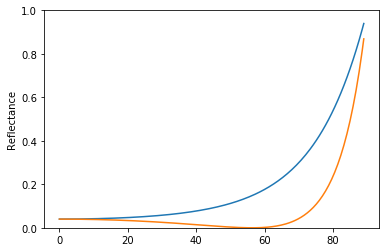

In [16]:
# For TE polarization
incidence,r,t,R,T=Angular(interface,wavelength,0.,0.,89.,200)
# For TM polarization, same incidence angles
incidence,r_p,t_p,R_p,T_p=Angular(interface,wavelength,1.,0.,89.,200)

# Visualization of the result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(incidence,R)
plt.plot(incidence,R_p)
plt.ylabel('Reflectance')
plt.ylim(0,1)
plt.show()


### A map of the field

First you have to define your "observation window" and there is a class `Window` for that. Essentially you need to specify : 

- The horizontal width of the window (in nm)
- Where you put the incident beam with respect to the window (or the other way around, which is why this parameter is in the object Window). The value 0 corresponds to the middle of the incident beam completely on the left, 1 means completely on the right, and 0.5 just in the middle.
- The horizontal size of a single pixel of the field map (real number, in nm)
- The vertical size of a single pixel (real number, in nm)

For a window of 70 wavelength, with a beam quite at 70% of the window, and square pixels 30 nm wide, this gives:

In [17]:
window=Window(70*wavelength,0.7,30.,30.)


Pixels horizontally: 1400


Now you need to define your incident beam by providing:

- The wavelength in vacuum, of course (the frequency, in reality)
- The angle of incidence (**in radian**)
- The polarization (0 or 1, as above)
- The beam typical width (the waist, in nm)

For a 10 wavelength wide beam, with a 45° incidence angle ($\pi/4$ radian) in TE polarization:


In [18]:
import numpy as np
beam=Beam(wavelength,np.pi/4,0,10*wavelength)


Incidence in degrees: 45.0
E//, TE, s polarization


Now you can call `field` to which you should provide three objects: the structure, the beam and the window...

Pixels vertically: 400


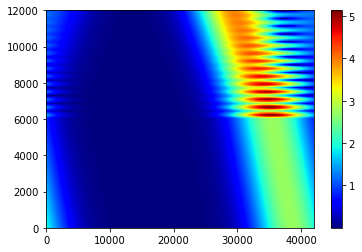

In [19]:
E=field(interface,beam,window)

plt.figure(2)
plt.imshow(abs(E),cmap='jet',extent=[0,window.width,0,sum(interface.thickness)],aspect='auto')
plt.colorbar()

> As you can see, the simulation domain is periodic: if something goes out on the right, it comes in on the left. 

We can directly modify the object Window to change the centering of the beam and the thickness of the substrate represented, making things clearer:


Pixels vertically: 600


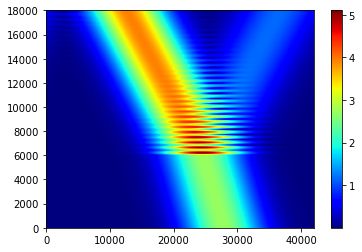

In [26]:
beam.polarization=0
window.C=0.3
interface.thickness[0]=20*wavelength
E=field(interface,beam,window)

plt.figure(2)
plt.imshow(abs(E),cmap='jet',extent=[0,window.width,0,sum(interface.thickness)],aspect='auto')
plt.colorbar()

Now the incident beam can be seen, as well as the reflected one and the interferences between the two. Representing the real part of the field instead of its modulus allows to visualize the wavefronts. We do that by representing only the positive values of the real part to make things prettier (it's just a matter of aesthetics). 

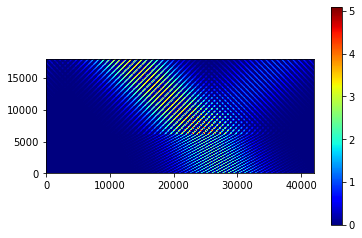

In [28]:
    F=np.real(E)
    plt.imshow(F*(F>0),cmap='jet',extent=[0,window.width,0,sum(interface.thickness)])
    plt.colorbar()
    plt.show()